In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(12,10)})

In [3]:
graphs = [
    "skos",
    "generations",
    "travel",
    "univ",
    "atom",
    "biomedical",
    "foaf",
    "people",
    "funding",
    "wine",
    "pizza",
    "core",
    "pathways",
    "enzyme",
    # "eclass",
]

In [4]:
df_cfg_g1_with_sppf = pd.concat(
    [
        pd.DataFrame({
            "graph": graph,
            "time_s": pd.read_csv(f"result/{graph}_cfg_g1_with_sppf.csv", header=None).divide(1e9)[0].to_numpy(),
        })
        for graph in graphs
    ],
)
df_rsm_g1_with_sppf = pd.concat(
    [
        pd.DataFrame({
            "graph": graph,
            "time_s": pd.read_csv(f"result/{graph}_rsm_g1_with_sppf.csv", header=None).divide(1e9)[0].to_numpy(),
        })
        for graph in graphs
    ],
)
dff = pd.concat(
    {
        "cfg": df_cfg_g1_with_sppf,
        "rsm": df_rsm_g1_with_sppf,
    },
).reset_index(level=0).rename(columns={"level_0": "grammar"})

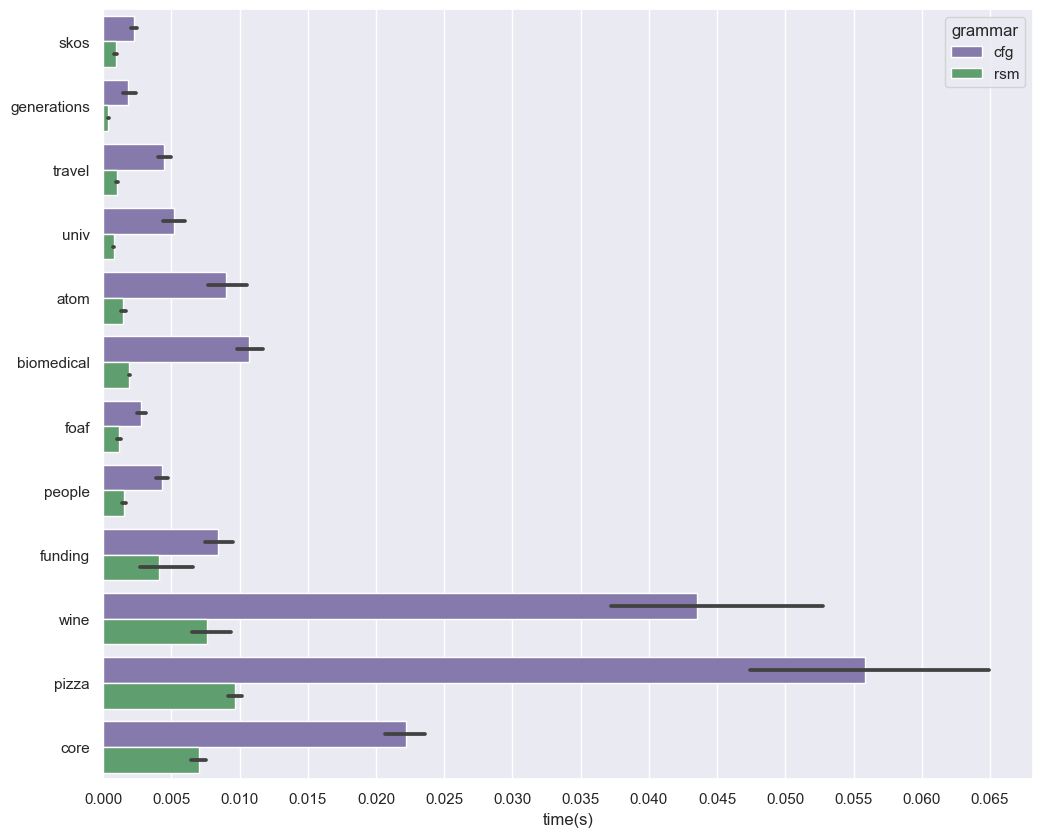

In [5]:
bp = sns.barplot(
    data = dff[(dff.graph != "pathways") & (dff.graph != "enzyme")],
    x="time_s",
    y="graph",
    hue="grammar",
    palette=["m", "g"],
)
start, end = bp.get_xlim()
bp.xaxis.set_ticks(np.arange(0, end, 0.005))
bp.set(xlabel='time(s)', ylabel='')
plt.savefig("pic1_with_sppf.png")
plt.show()

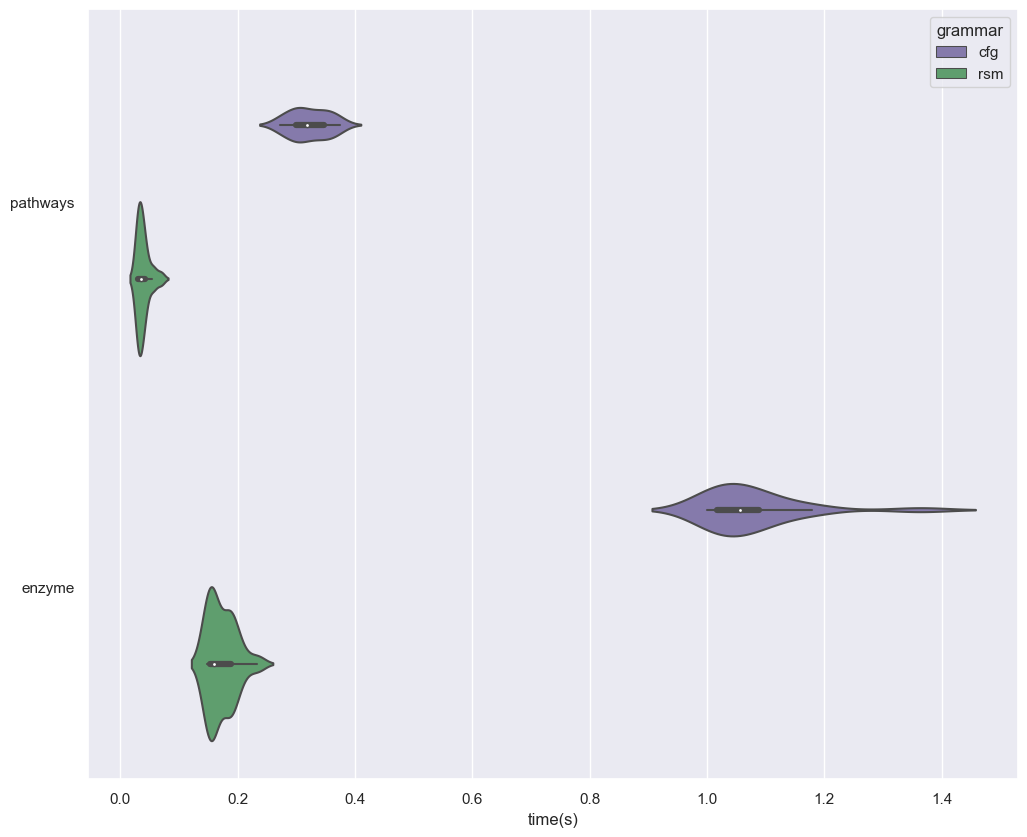

In [6]:
bp = sns.violinplot(
    data = dff[(dff.graph == "pathways") | (dff.graph == "enzyme")],
    x="time_s",
    y="graph",
    hue="grammar",
    palette=["m", "g"],
)
# start, end = bp.get_xlim()
# bp.xaxis.set_ticks(np.arange(0, end, 0.005))
bp.set(xlabel='time(s)', ylabel='')
plt.savefig("pic2_with_sppf.png")
plt.show()